## Tutoring 2 - Week 3: **DATA Wrangling**


TOPICS:
*   Missing Values
*   Outliers
*   Standardisation


DATA SET:
*   Heart Failure Prediction Dataset
* License: Open Data Commons Open Database License (ODbL) v1.0
* Citation and Source: fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.


LIBRARIES:
* pandas
* numpy
* seaborn
* matplotlib


---

## Context: 
Cardiovascular diseases (CVDs) are the number 1 cause of death globally

Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection.

## Atribute Information of Data set: 

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]**


---


## Import Libraries and download the data set to be used from GitHub:

In [1]:
#!pip install seaborn
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
##Download the data set from GitHub

##Edited version of the data set:
url = 'https://raw.githubusercontent.com/munamomo/tutoring/main/heart_edited.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)


## Go through the dataset and visually analyse it a bit: 

In [3]:
##Check the column names and size:

print("Column names: ",df.columns.to_list())
print("\n Number of rows: ",len(df.index),"\n Number of columns:",len(df.columns))

##Let's see the first rows in this data set
df.head(20)

Column names:  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

 Number of rows:  918 
 Number of columns: 12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0
6,45.0,F,ATA,130.0,237.0,0,Normal,170,N,0.0,Up,0
7,54.0,M,ATA,110.0,208.0,0,Normal,142,N,0.0,Up,0
8,37.0,M,ASY,140.0,207.0,0,Normal,130,Y,1.5,Flat,1
9,48.0,F,ATA,120.0,284.0,0,Normal,120,N,0.0,Up,0


## **Type of data: Numerical or Categorical**

In [4]:
## Check the type of data(Numerical or Categorical)
## Dtype in this set: float64, int64, object

df.info()

categ_columns = [col for col in df.columns if df[col].dtype=='object']
numerical_columns = [col for col in df.columns if (df[col].dtype=='float64' or df[col].dtype=='int64')]

print("\n Categorical features in this data set: ",categ_columns,"\n")
print("\n Numerical features in this data set: ",numerical_columns,"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       913 non-null    float64
 4   Cholesterol     917 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB

 Categorical features in this data set:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 


 Numerical features in this data set:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 

In [5]:
## View some statistical measurements of this data (only for numerical columns):

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,913.000000,917.000000,918.000000,918.000000,918.000000,918.000000
mean,65.814613,132.420591,291.942203,0.233115,136.809368,0.887364,0.553377
std,255.764281,18.541871,2644.291654,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,6000.000000,200.000000,80000.000000,1.000000,202.000000,6.200000,1.000000


## Checking for Missing values


In [6]:
##Missing values
df.isnull().sum()

Age               1
Sex               0
ChestPainType     0
RestingBP         5
Cholesterol       1
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Checking for Outliers

* Outliers are observations that deviate significantly from other values in a dataset.

In [7]:
# Function to Detection Outlier on one-dimentional datasets.
# IQR based filtering  (Interquartile Range)
def find_outliers(df, col_name):   
    percentile25 = df[col_name].quantile(0.25)
    percentile75 = df[col_name].quantile(0.75)
    
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    anomalies_upper = df[col_name][df[col_name] > upper_limit]
    anomalies_lower = df[col_name][df[col_name] < lower_limit]
    return_file_up = pd.DataFrame(anomalies_upper)
    return_file_lw = pd.DataFrame(anomalies_lower)

    if anomalies_upper.size != 0 and anomalies_lower.size != 0:
      anomalies_frame = pd.concat([return_file_up,return_file_lw])

    elif anomalies_lower.size != 0:
      anomalies_frame = return_file_lw

    elif anomalies_upper.size != 0:
      anomalies_frame = return_file_up
      
    return anomalies_frame


In [8]:
##Age Column Outliers based on IRQ Filtering:
find_outliers(df,'Age')

,Age
21,440.0
205,5000.0
452,6000.0


In [9]:
##Cholesterol Column Outliers based on IRQ Filtering:
find_outliers(df,'Cholesterol')

,Cholesterol
15,6000.0
28,468.0
30,518.0
69,412.0
76,529.0
...,...
515,0.0
518,0.0
535,0.0
536,0.0


## Replacing values

* One of the ways to deal with missing values or outliers is to remove the values with too many missing variables using a threshold.
* Or to replace it with some statistical measurement (mean, median, quantile...)

In [10]:
x = find_outliers(df,'Cholesterol')
find_output = list(x.index)

quart50_chol = df['Cholesterol'].quantile(0.5)
print(quart50_chol)

df['Cholesterol'].loc[find_output] = quart50_chol
print(df['Cholesterol'].loc[find_output])



223.0
15     223.0
28     223.0
30     223.0
69     223.0
76     223.0
       ...  
515    223.0
518    223.0
535    223.0
536    223.0
598    223.0
Name: Cholesterol, Length: 187, dtype: float64


e:\python\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
## Columns with missing values: Age,RestingBP,Cholesterol

## Replace them by the Quartile 50.

quart50_age = df['Age'].quantile(0.5)
print("Value of Quantile 50% for Age column: ",quart50_age,"\n")

print("Rows with NaN values in Age column: ",df['Age'][df['Age'].isna()],"\n")
df['Age'].fillna(quart50_age, inplace=True)

print(df['Age'].iloc[199],"\n")
print("Rows with NaN values in Age column: ",df['Age'][df['Age'].isna()],"\n")

Value of Quantile 50% for Age column:  54.0 

Rows with NaN values in Age column:  199   NaN
Name: Age, dtype: float64 

54.0 

Rows with NaN values in Age column:  Series([], Name: Age, dtype: float64) 



## Transforming Categorical into Numbers:

* get_dummies: all the columns with object or category dtype will be converted.

In [12]:
df_categorical = pd.get_dummies(df)
print(df_categorical)

      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0    40.0      140.0        289.0          0    172      0.0             0   
1    49.0      160.0        180.0          0    156      1.0             1   
2    37.0      130.0        283.0          0     98      0.0             0   
3    48.0      138.0        214.0          0    108      1.5             1   
4    54.0      150.0        195.0          0    122      0.0             0   
..    ...        ...          ...        ...    ...      ...           ...   
913  45.0      110.0        264.0          0    132      1.2             1   
914  68.0      144.0        193.0          1    141      3.4             1   
915  57.0      130.0        131.0          0    115      1.2             1   
916  57.0      130.0        236.0          0    174      0.0             1   
917  38.0      138.0        175.0          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestP

## Compute pairwise correlation of columns

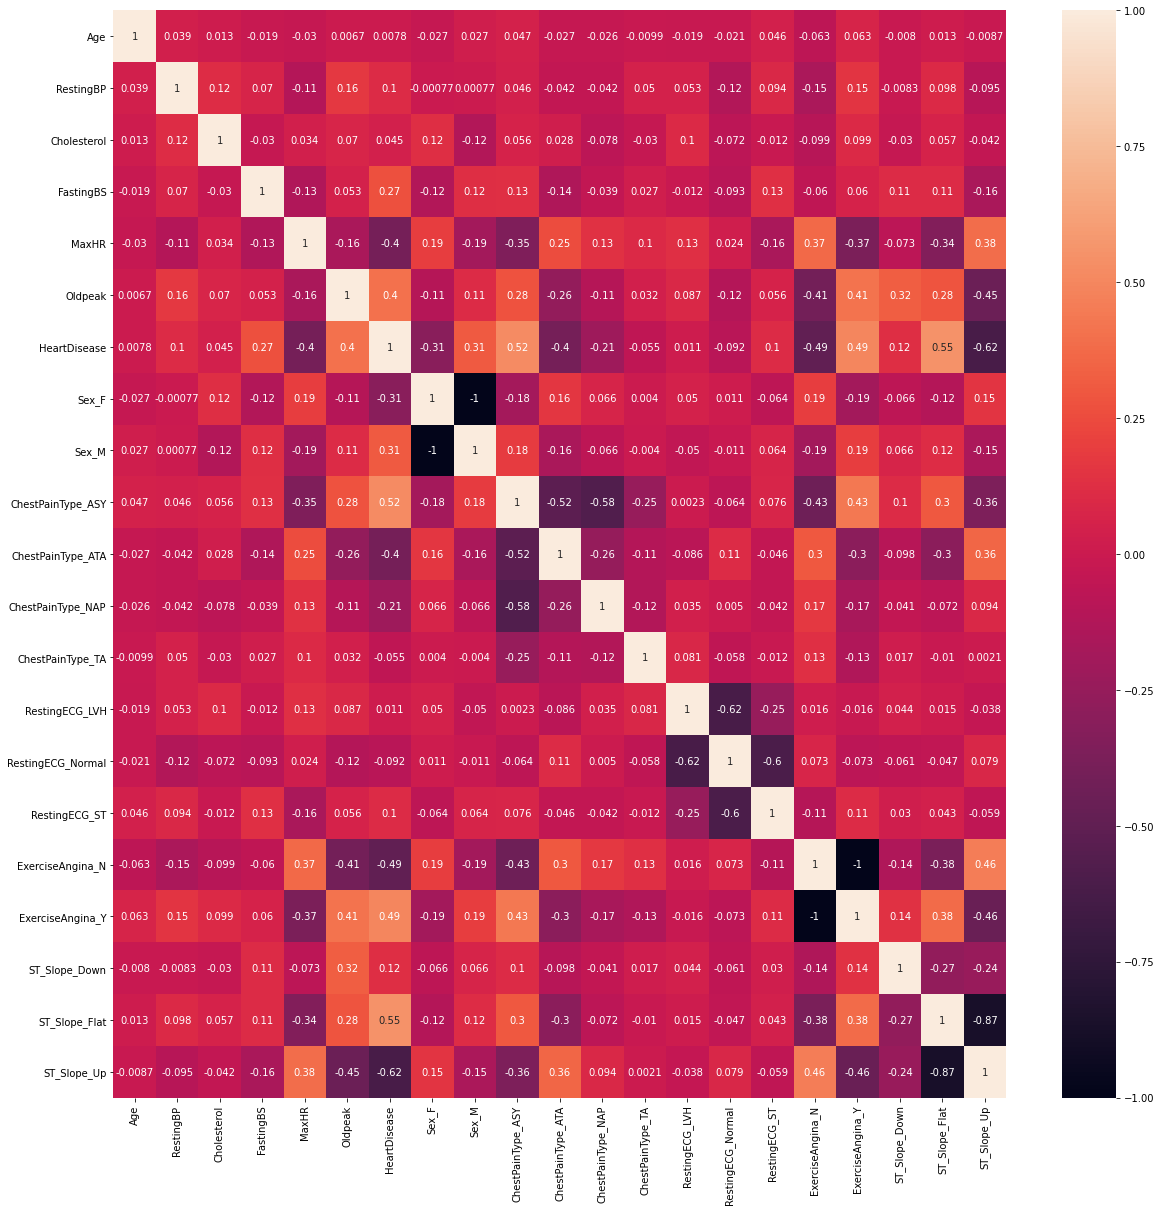

In [13]:
correlation = df_categorical.corr() ##default method='pearson'

plt.figure(figsize= (20,20))
sns.heatmap(correlation, annot=True)
plt.show()
